In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')

In [11]:
dim = 3
nump = 1000
nums = 1024
dt = .05

zeta = 1.0
m = 1.0
kBT = 1.0
F0 = 1.0

std = np.sqrt(2*kBT*zeta*dt) #eqn F11

In [12]:
R = np.zeros([nump, dim])
V = np.zeros([nump, dim])
W = np.zeros([nump, dim])
F = np.zeros([nump, dim])
Rs = np.zeros([nums, nump, dim])
Vs = np.zeros([nums, nump, dim])
Ws = np.zeros([nums, nump, dim])

F[:,0] = F0

time = np.zeros([nums])

In [13]:
np.random.seed(0)

for i in range(nums):
    W = std * np.random.randn(nump, dim)
    V = V * (1 - zeta/m*dt) + W/m + F/m*dt# eqn F9
    R = R + V*dt # update position eqn F5
    Rs[i]=R 
    Vs[i]=V 
    Ws[i]=W 
    
    time[i]=i*dt 

D = 1.0 (Theoretical)
D = 6.27094580394 (Simulation via MSD)


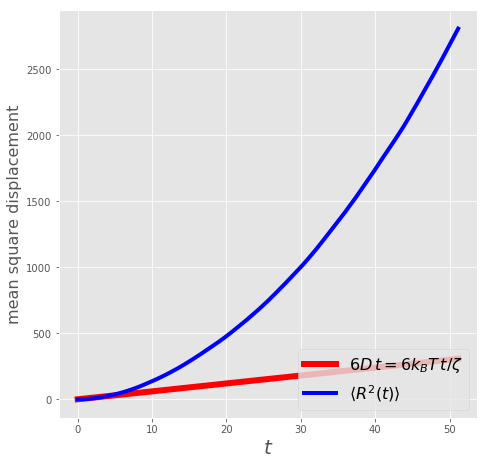

In [14]:
#mean squared displacement
msd = np.zeros([nums])
for i in range(nums):
    for n in range(nump):
        msd[i] = msd[i] + np.linalg.norm(Rs[i,n,:])**2
    msd[i] = msd[i]/nump

dmsd = np.trapz(msd, dx=dt) / (3*(nums*dt)**2)

print('D =', kBT/zeta, '(Theoretical)')
print('D =', dmsd, '(Simulation via MSD)')

fig, ax = plt.subplots(figsize=(7.5,7.5))

ax.set_xlabel(r"$t$", fontsize=20)
ax.set_ylabel(r"mean square displacement", fontsize=16)

ax.plot(time,6.0*kBT/zeta*time,'r',lw=6,label=r'$6D\,t={6k_BT \,t}/{\zeta}$')                         
ax.plot(time,msd,'b',lw=4,label=r'$\langle R^2(t)\rangle$')
ax.legend(fontsize=16,loc=4)

plt.show()

D = 1.0 (Theoretical)
D = 0.980302218583 (Simulation with External Force)


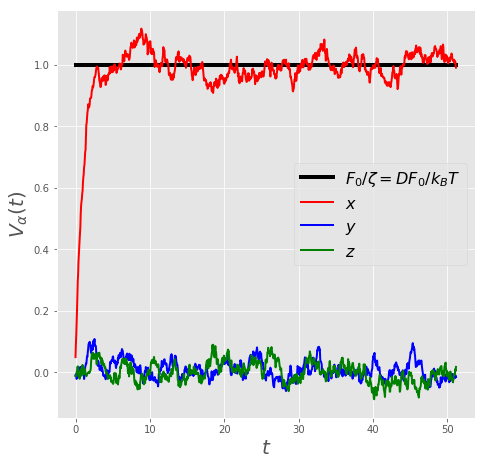

In [15]:
#drift velocity under external force

Vsa = np.average(Vs, axis=1)
Vx = np.average(Vsa[:,0])

print('D =', kBT/zeta, '(Theoretical)')
print('D =', Vx*kBT/F0, '(Simulation with External Force)')

fig, ax = plt.subplots(figsize=(7.5,7.5))

ax.set_ylabel(r"$V_{\alpha}(t)$", fontsize=20)
ax.set_xlabel(r"$t$", fontsize=20)

ax.plot(time,F0/zeta*np.ones(nums),'k',lw=4,label=r"$F_0/\zeta=DF_0/k_B T$")
ax.plot(time,Vsa[:,0],'r',lw=2,label="$x$")
ax.plot(time,Vsa[:,1],'b',lw=2,label="$y$")
ax.plot(time,Vsa[:,2],'g',lw=2,label="$z$")

ax.legend(fontsize=16,loc=5)

plt.show()

D = 1.0 (Theoretical)
D = 0.926874089843 (Simulation via MSD)


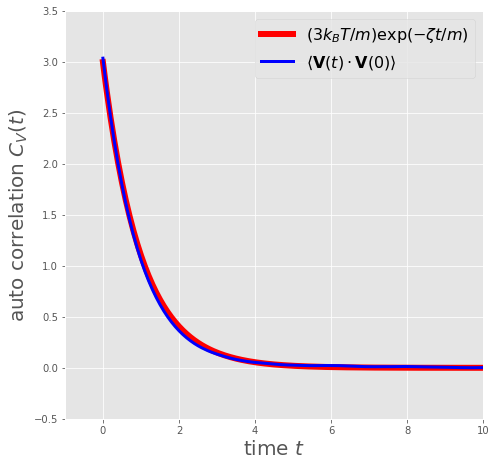

In [10]:
def auto_correlate(v):
    corr = np.correlate(v, v, mode="full")
    return corr[len(v) - 1:]/len(v) #take positive values and normalize

corr = np.zeros([nums])

for n in range(nump):
    for d in range(dim):
        corr = corr + auto_correlate(Vs[:,n,d])

corr = corr/nump #avg over all particles

print('D =', kBT/zeta, '(Theoretical)')
print('D =', dmsd, '(Simulation via MSD)')

fig, ax = plt.subplots(figsize=(7.5,7.5))

ax.plot(time,dim*kBT/m*np.exp(-zeta/m*time),'r',lw=6, label=r'$(3k_BT/m)\exp(-\zeta t/m)$')
ax.plot(time,corr, 'b',lw=3,label=r'$\langle\mathbf{V}(t)\cdot \mathbf{V}(0)\rangle$')

ax.set_xlabel(r"time $t$", fontsize=20)
ax.set_ylabel(r"auto correlation $C_V(t)$", fontsize=20)
ax.set_xlim(-1,10)
ax.set_ylim(-0.5,3.5)
ax.legend(fontsize=16)

plt.show()

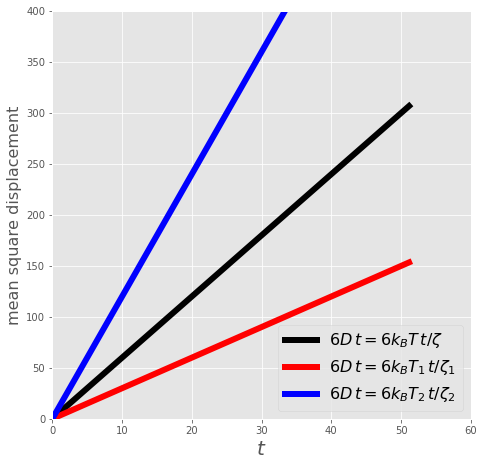

In [23]:
fig, ax = plt.subplots(figsize=(7.5,7.5))

ax.set_xlabel(r"$t$", fontsize=20)
ax.set_ylabel(r"mean square displacement", fontsize=16)
ax.set_xlim(0, 60)
ax.set_ylim(0, 400)

m = 1.0
zeta = 1.0
kBT = 1.0

m1 = 2.0
zeta1 = 2.0
kBT1 = 1.0

m2 = 1
zeta2 = 1.0
kBT2 = 2.0

ax.plot(time,6.0*kBT/zeta*time,'black',lw=6,label=r'$6D\,t={6k_BT \,t}/{\zeta}$')                         
ax.plot(time,6.0*kBT1/zeta1*time,'red',lw=6,label=r'$6D\,t={6k_BT_1 \,t}/{\zeta_1}$')                         
ax.plot(time,6.0*kBT2/zeta2*time,'blue',lw=6,label=r'$6D\,t={6k_BT_2 \,t}/{\zeta_2}$')                         

ax.legend(fontsize=16,loc=4)

plt.show()

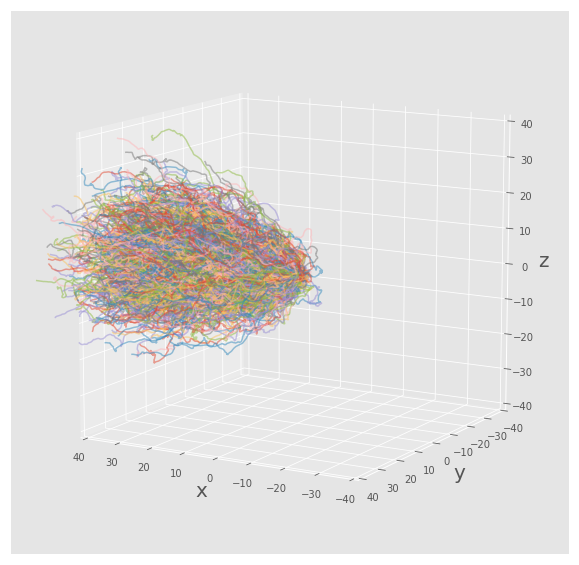

In [24]:
from mpl_toolkits.mplot3d import Axes3D # import Axes3D from `mpl_toolkits.mplot3d`

box=80. # set draw area as box^3

fig = plt.figure(figsize=(10,10)) # set fig with its size 10 x 10 inch

ax = fig.add_subplot(111,projection='3d') # creates an additional axis to the standard 2D axes

ax.set_xlim(-box/2,box/2) # set x-range
ax.set_ylim(-box/2,box/2) # set y-range
ax.set_zlim(-box/2,box/2) # set z-range
ax.set_xlabel(r"x",fontsize=20) # set x-label
ax.set_ylabel(r"y",fontsize=20) # set y-label
ax.set_zlabel(r"z",fontsize=20) # set z-label
ax.view_init(elev=12,azim=120) # set view point

for n in range(nump): # repeat from n=0 to nump-1
    ax.plot(Rs[:,n,0],Rs[:,n,1],Rs[:,n,2],alpha=0.5) # plot trajectiries of all particle

plt.show() # draw plots